# Assignment 3

# EEG signal processing - basics

Importing data
1. Get the EEG/MEG dataset from https://mne.tools/0.11/auto_tutorials/plot_introduction.html?highlight=eeg#access-raw-data
    
2. Import data using standard import functions : <br>
   Data is imported using from "mne.datasets import sample"


In [1]:
import mne
from math import inf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mne.datasets import sample
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
print(raw_fname)

/home/heera/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif


## Checking data structures

1. What are the various information in the data?<br>
    Information in data can be achived using "raw.info"
2. How are they structured? <br>
    Different information is stored in different data structure like list,Transform,dict,tuple, and float etc.
3. Can you find any meta information about the data?<br>
    yes, we can observe mata data in "raw.info" like " meas_date : tuple | 2002-12-03 19:01:10 GMT"
4. What were the filters already applied in the data during recording?<br>
    Highpass and Lowpass filters are already applied, specifications are "highpass : float | 0.10000000149011612 Hz" and "lowpass : float | 40.0 Hz"
5. Do you find something like channel type? What are the types in your signal?<br>
    yes, it's "chs" and gives all types of channels like " chs : list | 376 items (GRAD: 204, MAG: 102, STIM: 9, EEG: 60, EOG: 1)"


In [2]:
raw = mne.io.Raw(raw_fname)
print(raw)
print(raw.info)

Opening raw data file /home/heera/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0
<Raw  |  sample_audvis_filt-0-40_raw.fif, n_channels x n_times : 376 x 41700 (277.7 sec), ~3.7 MB, data not loaded>
<Info | 19 non-empty fields
    bads : list | MEG 2443, EEG 053
    ch_names : list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : list | 376 items (GRAD: 204, MAG: 102, STIM: 9, EEG: 60, EOG: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : Digitization | 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149011612 Hz
    hpi_mea

In [3]:
print(type(raw))
print(type(raw.info))

<class 'mne.io.fiff.raw.Raw'>
<class 'mne.io.meas_info.Info'>


1. Can you extract each of them separately? How?<br>
    Yes, we can exract each cannel seprately using pick types like - "eeg = raw.copy().pick_types(meg=False, eeg=True)"
2. Can you list all the channel names?<br>
    Channels list can be printed using "print(raw.ch_names)"


In [4]:
print(raw.ch_names)

['MEG 0113', 'MEG 0112', 'MEG 0111', 'MEG 0122', 'MEG 0123', 'MEG 0121', 'MEG 0132', 'MEG 0133', 'MEG 0131', 'MEG 0143', 'MEG 0142', 'MEG 0141', 'MEG 0213', 'MEG 0212', 'MEG 0211', 'MEG 0222', 'MEG 0223', 'MEG 0221', 'MEG 0232', 'MEG 0233', 'MEG 0231', 'MEG 0243', 'MEG 0242', 'MEG 0241', 'MEG 0313', 'MEG 0312', 'MEG 0311', 'MEG 0322', 'MEG 0323', 'MEG 0321', 'MEG 0333', 'MEG 0332', 'MEG 0331', 'MEG 0343', 'MEG 0342', 'MEG 0341', 'MEG 0413', 'MEG 0412', 'MEG 0411', 'MEG 0422', 'MEG 0423', 'MEG 0421', 'MEG 0432', 'MEG 0433', 'MEG 0431', 'MEG 0443', 'MEG 0442', 'MEG 0441', 'MEG 0513', 'MEG 0512', 'MEG 0511', 'MEG 0523', 'MEG 0522', 'MEG 0521', 'MEG 0532', 'MEG 0533', 'MEG 0531', 'MEG 0542', 'MEG 0543', 'MEG 0541', 'MEG 0613', 'MEG 0612', 'MEG 0611', 'MEG 0622', 'MEG 0623', 'MEG 0621', 'MEG 0633', 'MEG 0632', 'MEG 0631', 'MEG 0642', 'MEG 0643', 'MEG 0641', 'MEG 0713', 'MEG 0712', 'MEG 0711', 'MEG 0723', 'MEG 0722', 'MEG 0721', 'MEG 0733', 'MEG 0732', 'MEG 0731', 'MEG 0743', 'MEG 0742', 'ME

1. List only all EEG channel labels?<br>
        Only eeg channel labels can be printed using "print(eeg.ch_names)"

In [5]:
raw.load_data()
eeg = raw.copy().pick_types(meg=False, eeg=True)
print(eeg.ch_names)

Reading 0 ... 41699  =      0.000 ...   277.709 secs...
['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 008', 'EEG 009', 'EEG 010', 'EEG 011', 'EEG 012', 'EEG 013', 'EEG 014', 'EEG 015', 'EEG 016', 'EEG 017', 'EEG 018', 'EEG 019', 'EEG 020', 'EEG 021', 'EEG 022', 'EEG 023', 'EEG 024', 'EEG 025', 'EEG 026', 'EEG 027', 'EEG 028', 'EEG 029', 'EEG 030', 'EEG 031', 'EEG 032', 'EEG 033', 'EEG 034', 'EEG 035', 'EEG 036', 'EEG 037', 'EEG 038', 'EEG 039', 'EEG 040', 'EEG 041', 'EEG 042', 'EEG 043', 'EEG 044', 'EEG 045', 'EEG 046', 'EEG 047', 'EEG 048', 'EEG 049', 'EEG 050', 'EEG 051', 'EEG 052', 'EEG 054', 'EEG 055', 'EEG 056', 'EEG 057', 'EEG 058', 'EEG 059', 'EEG 060']


How are the data structure of channel labels different from the time series?<br>
    Channels data is stored in the form of list.

## Plotting RAW data


Plot the raw data - grouped by  channel type (MEG, EEG, STI channels) - How do they look?
1. What is the typical amplitude of different channel types?<br>
    meg (mag) : For MEG magnetometers channels stored in Tesla (T)<br>
    meg (grad) : For MEG gradiometers channels stored in Tesla/Meter (T/m)<br>
    stim : For the stimulus (a.k.a. trigger) channels (AU)<br>
    eeg : For EEG channels stored in Volts (V)<br>
2. Do you find any large fluctuations? If yes, what is the probable source?<br>
    Yes, we can observe it in the MEG data like "MEG 0113" is having fluctuations due to the ECG.
3. Can you find and plot the ECG/EOG channels?<br>
    EOG is plotted below and ECG is not recorded in this experiment.
4. How does the STI channel differ from other channels?<br>
    Other channels continues with time or biological data but SIT is time of stimulation is recorded.


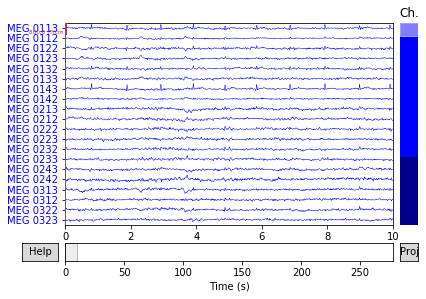

In [6]:
raw.load_data()
fig = raw.copy().pick_types(meg=True, eeg=False).plot()
#meg (mag) : For MEG magnetometers channels stored in Tesla (T)
#meg (grad) : For MEG gradiometers channels stored in Tesla/Meter (T/m)

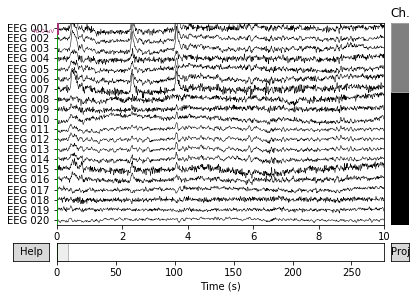

In [7]:
fig = raw.copy().pick_types(meg=False, eeg=True).plot()
#eeg : For EEG channels stored in Volts (V)

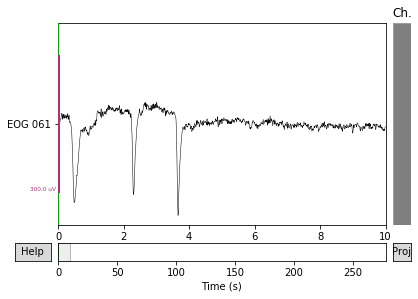

In [8]:
fig = raw.copy().pick_types(meg=False, eeg=False, eog =True).plot()

#print(raw.copy().info)

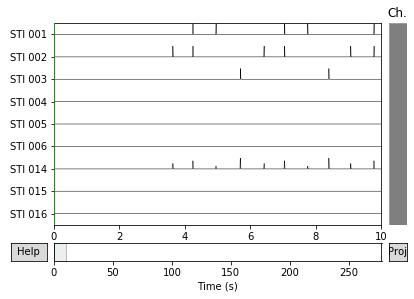

In [9]:
fig = raw.copy().pick_types(meg=False, eeg=False, eog =False, stim=True).plot()
#stim : For the stimulus (a.k.a. trigger) channels (AU)

Effective window size : 13.639 (s)
Effective window size : 13.639 (s)
Effective window size : 13.639 (s)


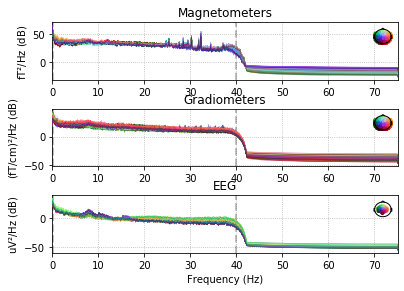

In [10]:
fig == raw.copy().plot_psd()
plt.show()

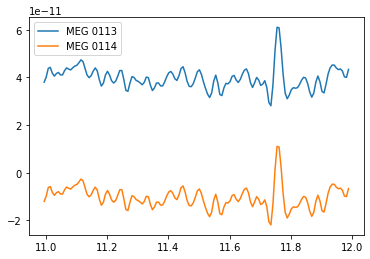

In [11]:
import matplotlib.pyplot as plt
sam_freq = raw.info['sfreq']
times = np.array([11,12])
samp_points = (times * sam_freq).astype(int)
raw_selection = raw[['MEG 0113','MEG 0114'],samp_points[0]:samp_points[1]]
y_offset = np.array([5e-11,0])
y=raw_selection[0].T + y_offset
x=raw_selection[1]
lines = plt.plot(x, y)
plt.legend(lines,['MEG 0113','MEG 0114'])

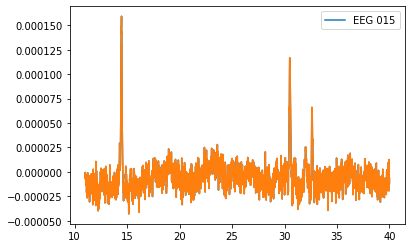

In [12]:
import matplotlib.pyplot as plt
sam_freq = raw.info['sfreq']
times = np.array([11,40])
samp_points = (times * sam_freq).astype(int)
raw_selection = raw[['EEG 015'],samp_points[0]:samp_points[1]]
y_offset = np.array([5e-11,0])
y=raw_selection[0].T + y_offset
x=raw_selection[1]
lines = plt.plot(x, y)
plt.legend(lines,['EEG 015'])

## Filtering data


1. Separate out only the EEG channels for this exercise.<br>
    eeg = raw.copy().pick_types(meg=False, eeg=True, eog =False, stim=False)
    EEG is seprated using ""
2. Run both IIR and FIR bandpass filters <br>
    a. How long does it take?<br>
    FIR = 3.302 sec <br>
    b. How different are the outputs?
    They different in terms of roll-off rate <br>
    FIR :Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz),Upper transition bandwidth:   10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)<br>
    IIR : Filter order 16 (effective, after forward-backward), Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB
        


Effective window size : 13.639 (s)


<Figure size 1440x720 with 0 Axes>

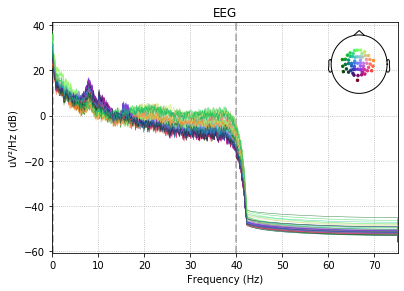

In [13]:
eeg = raw.copy().pick_types(meg=False, eeg=True, eog =False, stim=False)
plt.figure(figsize=(20,10))
eeg.plot_psd()
plt.show()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 497 samples (3.310 sec)



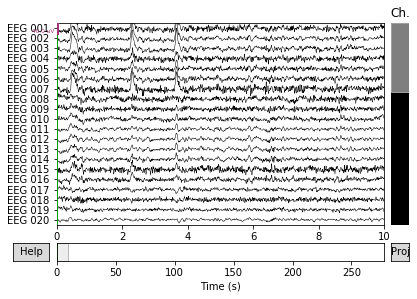

In [14]:
eeg.filter(l_freq=1, h_freq=40,method='fir').plot()
plt.show()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB



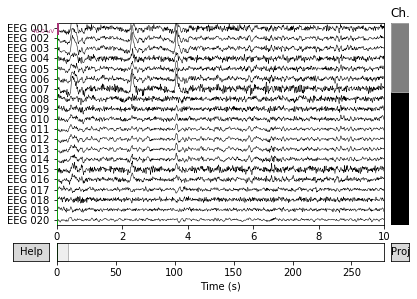

In [15]:
eegf=eeg.filter(1,40,['eeg'],method='iir')
eegf.plot()
plt.show()

# Artefact rejection


1. ECG & EOG rejection from MEG data<br>
    a. Try running and ICA and plotting ICA components in topographical format. Can you identify and reject the ECG artifactual components? <br>
    b.Compare the pre- vs post-rejection data? Does it look cleaner?<br>
    c. Try using SSP to perform the same operation? Contrast outputs.<br>
  


## Rejection using ICA

In [16]:
import numpy as np

import mne
from mne.preprocessing import ICA
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
from mne.datasets import sample

Opening raw data file /home/heera/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0
Reading 0 ... 41699  =      0.000 ...   277.709 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 497 samples (3.310 sec)



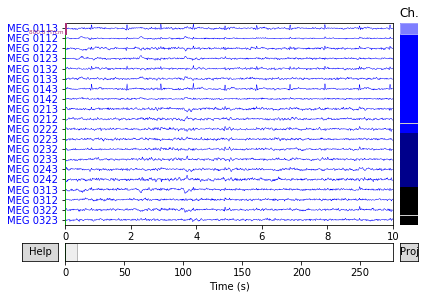

In [17]:
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'

raw = mne.io.read_raw_fif(raw_fname, preload=True)
raw.filter(1, None, fir_design='firwin')  # already lowpassed @ 40
# raw.annotations = mne.Annotations([0], [10], 'bad')
raw.plot(block=True)
plt.show()

In [18]:
ica = ICA(n_components=0.90, method='fastica', random_state=0, max_iter=100)

picks = mne.pick_types(raw.info, meg=True, eeg=False, eog=False,
                       stim=False, exclude='bads')

ica.fit(raw, picks=picks, decim=3, reject=dict(mag=4e-12, grad=4000e-13),
        verbose='warning')  # low iterations -> does not fully converge

# maximum number of components to reject
n_max_ecg, n_max_eog = 3, 1  # here we don't expect horizontal EOG components

/home/heera/anaconda3/envs/ds/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2048 samples (13.639 sec)

Number of ECG events detected : 284 (average pulse 61 / min.)
284 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 3)
Loading data for 284 events and 151 original time points ...
0 bad epochs dropped
Reconstructing ECG signal from Magnetometers


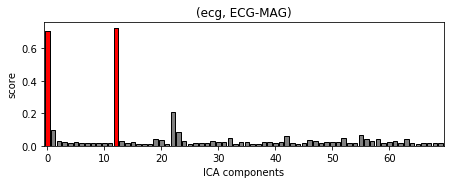

<ipython-input-19-2a4eafa016db>:12: DeprecationWarning: The "exclude" parameter is deprecated and will be removed in version 0.20; specify excluded components using the ICA.exclude attribute instead. Provided value of [12, 0] will be ignored; falling back to ICA.exclude
  ica.plot_sources(raw, show_picks, exclude=ecg_inds, title=title % 'ecg')


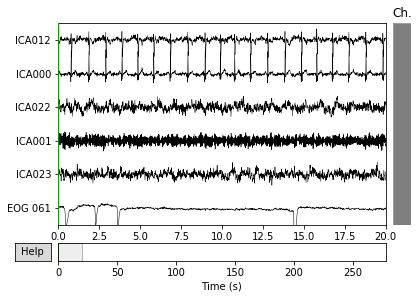

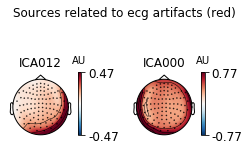

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2048 samples (13.639 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2048 s

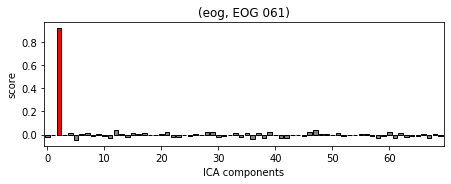

<ipython-input-19-2a4eafa016db>:25: DeprecationWarning: The "exclude" parameter is deprecated and will be removed in version 0.20; specify excluded components using the ICA.exclude attribute instead. Provided value of [2] will be ignored; falling back to ICA.exclude
  ica.plot_sources(raw, show_picks, exclude=eog_inds, title=title % 'eog')


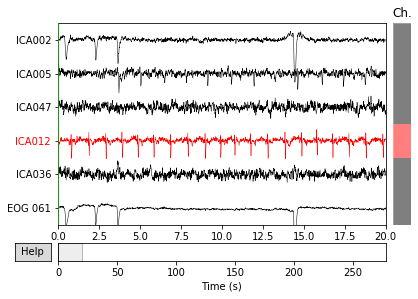

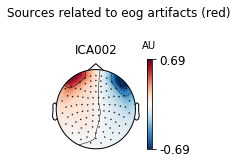

In [19]:
title = 'Sources related to %s artifacts (red)'

# generate ECG epochs use detection via phase statistics

ecg_epochs = create_ecg_epochs(raw, tmin=-.5, tmax=.5, picks=picks)

ecg_inds, scores = ica.find_bads_ecg(ecg_epochs, method='ctps')
ica.plot_scores(scores, exclude=ecg_inds, title=title % 'ecg', labels='ecg')

show_picks = np.abs(scores).argsort()[::-1][:5]

ica.plot_sources(raw, show_picks, exclude=ecg_inds, title=title % 'ecg')
ica.plot_components(ecg_inds, title=title % 'ecg', colorbar=True)

ecg_inds = ecg_inds[:n_max_ecg]
ica.exclude += ecg_inds

# detect EOG by correlation

eog_inds, scores = ica.find_bads_eog(raw)
ica.plot_scores(scores, exclude=eog_inds, title=title % 'eog', labels='eog')

show_picks = np.abs(scores).argsort()[::-1][:5]

ica.plot_sources(raw, show_picks, exclude=eog_inds, title=title % 'eog')
ica.plot_components(eog_inds, title=title % 'eog', colorbar=True)

eog_inds = eog_inds[:n_max_eog]
ica.exclude += eog_inds


<ipython-input-20-4313a13e9a8a>:3: DeprecationWarning: The "exclude" parameter is deprecated and will be removed in version 0.20; specify excluded components using the ICA.exclude attribute instead. Provided value of [12, 0] will be ignored; falling back to ICA.exclude
  ica.plot_sources(ecg_evoked, exclude=ecg_inds)  # plot ECG sources + selection


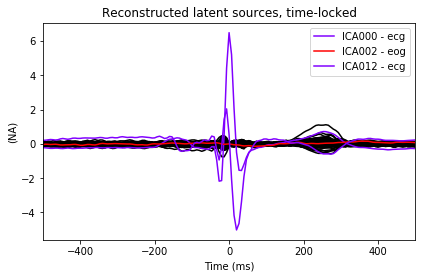

Transforming to ICA space (70 components)
Zeroing out 3 ICA components


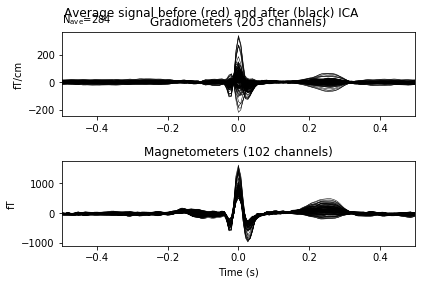

EOG channel index for this subject is: [375]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2048 samples (13.639 sec)

Now detecting blinks and generating corresponding events
Found 46 significant peaks
Number of EOG events detected : 46
46 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 3)
Loading data for 46 events and 151 original time points ...
0 bad epochs dropped


<ipython-input-20-4313a13e9a8a>:7: DeprecationWarning: The "exclude" parameter is deprecated and will be removed in version 0.20; specify excluded components using the ICA.exclude attribute instead. Provided value of [2] will be ignored; falling back to ICA.exclude
  ica.plot_sources(eog_evoked, exclude=eog_inds)  # plot EOG sources + selection


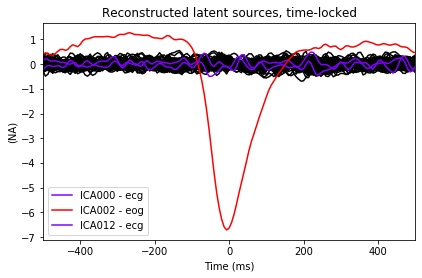

Transforming to ICA space (70 components)
Zeroing out 3 ICA components


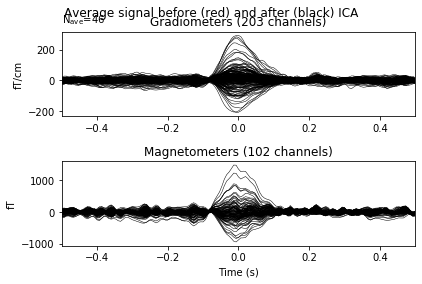

Transforming to ICA space (70 components)
Zeroing out 3 ICA components


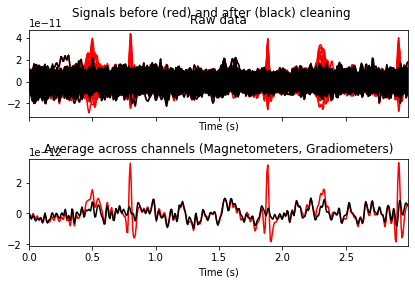

In [20]:
# estimate average artifact
ecg_evoked = ecg_epochs.average()
ica.plot_sources(ecg_evoked, exclude=ecg_inds)  # plot ECG sources + selection
ica.plot_overlay(ecg_evoked, exclude=ecg_inds)  # plot ECG cleaning

eog_evoked = create_eog_epochs(raw, tmin=-.5, tmax=.5, picks=picks).average()
ica.plot_sources(eog_evoked, exclude=eog_inds)  # plot EOG sources + selection
ica.plot_overlay(eog_evoked, exclude=eog_inds)  # plot EOG cleaning

# check the amplitudes do not change
ica.plot_overlay(raw)  # EOG artifacts remain
plt.show()

## Rejection of ECG using SSP

In [21]:
import numpy as np

import mne
from mne.datasets import sample
from mne.preprocessing import compute_proj_ecg, compute_proj_eog

# getting some data ready
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'

raw = mne.io.read_raw_fif(raw_fname, preload=True)

Opening raw data file /home/heera/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0
Reading 0 ... 41699  =      0.000 ...   277.709 secs...


Including 4 SSP projectors from raw file
Running ECG SSP computation
Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 5 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 35.25 Hz)
- Filter length: 2048 samples (13.639 sec)

Number of ECG events detected : 285 (average pulse 61 / min.)
Computing projector
Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass fil

    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 006', 'EEG 044', 'EEG 054', 'EEG 055', 'EEG 056', 'EEG 057', 'EEG 059']
    Rejecting  epoch based on EEG : ['EEG 054']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 006', 'EEG 007', 'EEG 008', 'EEG 012', 'EEG 013', 'EEG 014', 'EEG 015', 'EEG 023', 'EEG 046', 'EEG 047', 'EEG 048', 'EEG 055', 'EEG 056', 'EEG 059']
    Rejecting  epoch based on EEG : ['EEG 004', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 054', 'EEG 057']
    Rejecting  epoch based on EEG : ['EEG 015', 'EEG 016', 'EEG 022', 'EEG 023', 'EEG 024', 'EEG 034', 'EEG 035']
    Rejecting  epoch based on EEG : ['EEG 002', 'EEG 015']
    Rejecting  epoch based on EEG : ['EEG 044', 'EEG 054', 'EEG 056', 'EEG 057', 'EEG 059']
    Rejecting  epoch based on EEG : ['EEG 005', 'EEG 006', 'EEG 014', 'EEG 054']
    Rejecting  epoch based on EEG : ['EEG 046', 'EEG 054', 'EEG 057']
    Rejecting  epoch based on EEG : ['EEG 044', 'EEG 054', 'EEG 056',

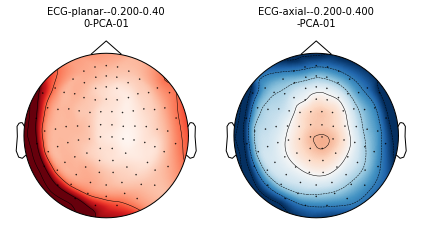

In [22]:
projs, events = compute_proj_ecg(raw, n_grad=1, n_mag=1, n_eeg=0, average=True)
print(projs)

ecg_projs = projs[-2:]
mne.viz.plot_projs_topomap(ecg_projs)
plt.show()

Including 4 SSP projectors from raw file
Running EOG SSP computation
EOG channel index for this subject is: [375]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2048 samples (13.639 sec)

Now detecting blinks and generating corresponding events
Found 46 significant peaks
Number of EOG events detected : 46
Computing projector
Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter 

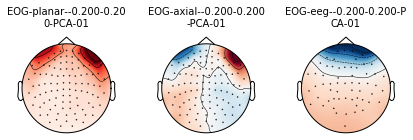

In [23]:
projs, events = compute_proj_eog(raw, n_grad=1, n_mag=1, n_eeg=1, average=True)
print(projs)

eog_projs = projs[-3:]
mne.viz.plot_projs_topomap(eog_projs, info=raw.info)
plt.show()

In [24]:
raw.info['projs'] += eog_projs + ecg_projs

319 events found
Event IDs: [ 1  2  3  4  5 32]
72 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 9)
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061'

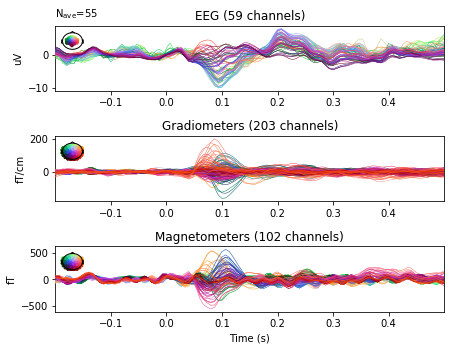

72 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 9)
9 projection items activated
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']


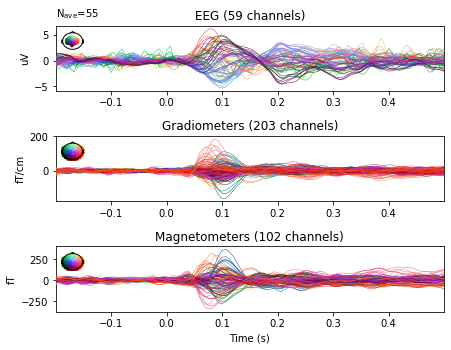

In [25]:
events = mne.find_events(raw, stim_channel='STI 014')
reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)
# this can be highly data dependent
event_id = {'auditory/left': 1}

epochs_no_proj = mne.Epochs(raw, events, event_id, tmin=-0.2, tmax=0.5,
                            proj=False, baseline=(None, 0), reject=reject)
epochs_no_proj.average().plot(spatial_colors=True, time_unit='s')


epochs_proj = mne.Epochs(raw, events, event_id, tmin=-0.2, tmax=0.5, proj=True,
                         baseline=(None, 0), reject=reject)
epochs_proj.average().plot(spatial_colors=True, time_unit='s')
plt.show()

72 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Entering delayed SSP mode.
Created an SSP operator (subspace dimension = 9)
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']


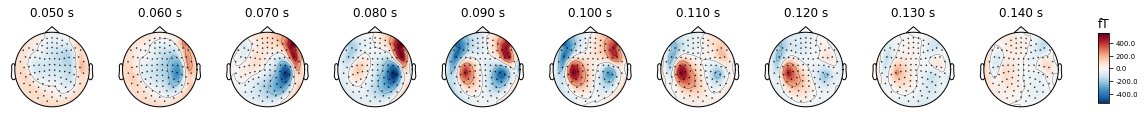

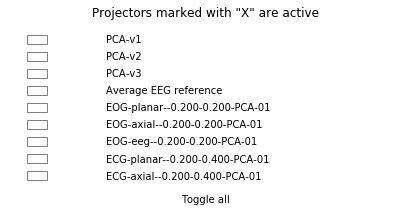

In [26]:
evoked = mne.Epochs(raw, events, event_id, tmin=-0.2, tmax=0.5,
                    proj='delayed', baseline=(None, 0),
                    reject=reject).average()

# set time instants in seconds (from 50 to 150ms in a step of 10ms)
times = np.arange(0.05, 0.15, 0.01)

fig = evoked.plot_topomap(times, proj='interactive', time_unit='s')

# Epoching
1. Can we now epoch or split data based on events i.e., stimulus presentation times?
2. What does the data structure look like? What does the time series vector look like? 
3. Average the trials/epochs to create an evoked potential structure.<br>
    Steps involved in epoching are as following.


In [27]:
import os.path as op
import numpy as np
import mne

In [28]:
data_path = mne.datasets.sample.data_path()
fname = op.join(data_path, 'MEG', 'sample', 'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(fname)
raw.set_eeg_reference('average', projection=True)  # set EEG average reference

Opening raw data file /home/heera/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Adding average EEG reference projection.
1 projection items deactivated


<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 376 x 166800 (277.7 sec), ~3.7 MB, data not loaded>

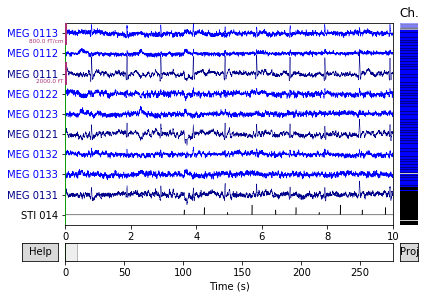

In [29]:
order = np.arange(raw.info['nchan'])
order[9] = 312  # We exchange the plotting order of two channels
order[312] = 9  # to show the trigger channel as the 10th channel.
raw.plot(n_channels=10, order=order, block=True)
plt.show()

320 events found
Event IDs: [ 1  2  3  4  5 32]
Found 320 events, first five:
[[27977     0     2]
 [28345     0     3]
 [28771     0     1]
 [29219     0     4]
 [29652     0     2]]


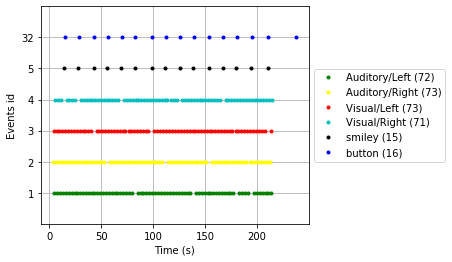

In [30]:
events = mne.find_events(raw)
print('Found %s events, first five:' % len(events))
print(events[:5])

# Plot the events to get an idea of the paradigm
# Specify colors and an event_id dictionary for the legend.
event_id = {'Auditory/Left': 1, 'Auditory/Right': 2,
            'Visual/Left': 3, 'Visual/Right': 4,
            'smiley': 5, 'button': 32}
color = {1: 'green', 2: 'yellow', 3: 'red', 4: 'c', 5: 'black', 32: 'blue'}

mne.viz.plot_events(events, raw.info['sfreq'], raw.first_samp, color=color,
                    event_id=event_id)
plt.show()

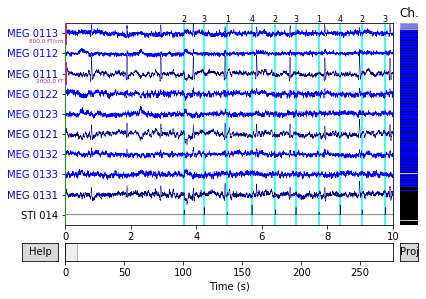

In [31]:
raw.plot(events=events, n_channels=10, order=order)
plt.show()

In [32]:
tmin, tmax = -0.2, 0.5
event_id = {'Auditory/Left': 1, 'Auditory/Right': 2,
            'Visual/Left': 3, 'Visual/Right': 4}
# Only pick MEG and EOG channels.
picks = mne.pick_types(raw.info, meg=True, eeg=False, eog=True)

In [33]:
baseline = (None, 0.0)
reject = {'mag': 4e-12, 'eog': 200e-6}
epochs = mne.Epochs(raw, events=events, event_id=event_id, tmin=tmin,
                    tmax=tmax, baseline=baseline, reject=reject, picks=picks)

289 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 3)
4 projection items activated


Loading data for 289 events and 421 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch base

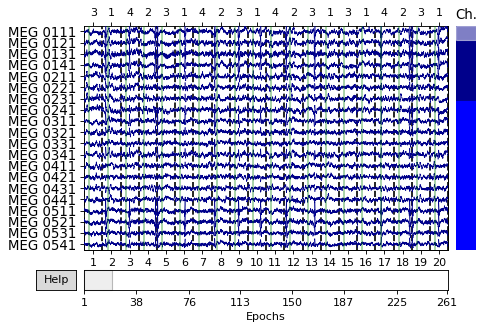

In [34]:
epochs.plot(block=True)
plt.show()

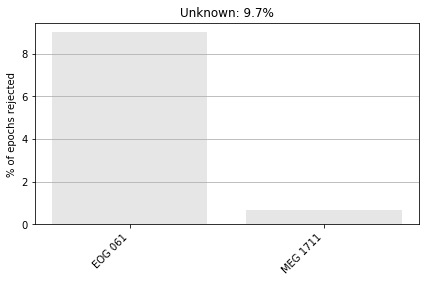

In [35]:
epochs.plot_drop_log()
plt.show()

In [36]:
picks = mne.pick_types(epochs.info, meg=True, eog=True)
evoked_left = epochs['Auditory/Left'].average(picks=picks)
evoked_right = epochs['Auditory/Right'].average(picks=picks)

In [37]:
epochs_left = epochs['Left']

# ... or to select a very specific subset. This is the same as above:
evoked_left = epochs['Left/Auditory'].average(picks=picks)

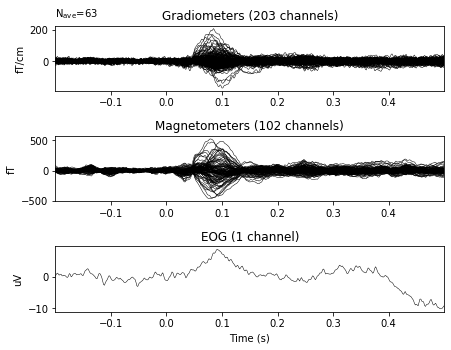

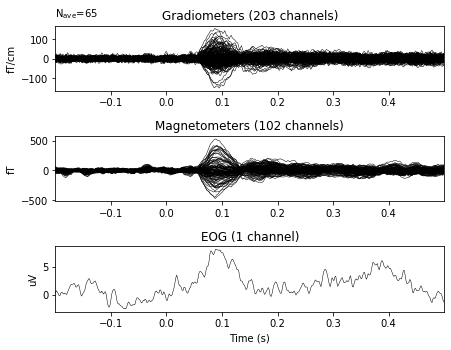

In [38]:
evoked_left.plot()
evoked_right.plot()
plt.show()

# Render a flowchart of the steps taken and process flow. 


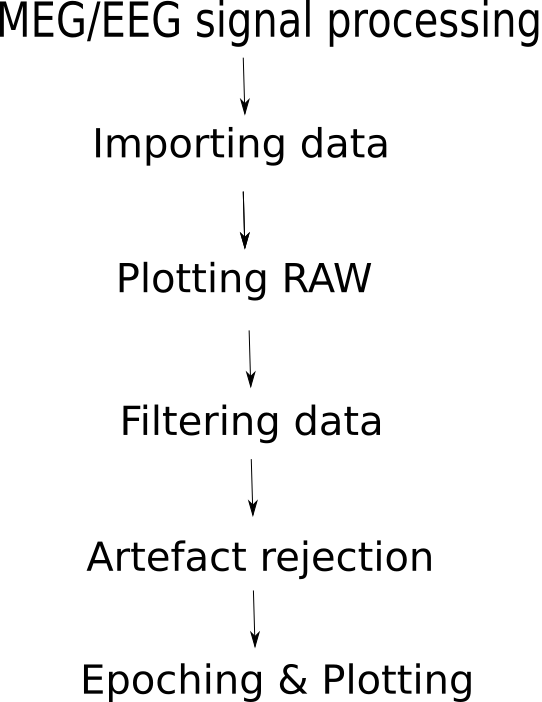

In [39]:
from IPython.display import Image, display
display(Image(filename="vg.png"))